<a href="https://colab.research.google.com/github/MohamedElsayed002/DeepLearning_Study/blob/master/DeepLearningCategoricalCrossEntropy8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorical Cross Entropy Loss

In this lab we going to use the MNIST hand-writen digits as a set motivating example to understand categorical cross-entropy loss.


## House Number Detection

You have been tasked with building a model that can recognize house numbers from arbitrary street-view images. You are given a set of images of single-digit house numbers engraved into slates or wall surfaces. The images vary in size and color. In this lab, we are going to use the MNIST hand-written digits dataset as a motivating example to understand the __softmax function__, __one-hot encoding__, and __categorical cross-entropy loss__. The MNIST hand-written dataset has 10 classes, each representing a digit from 0-9. We will attempt to build a multi-class classification model that will identify which digit is present in the image.




<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/house_number.jpg" style="width: 30%">

<!-- Original Source: https://slate.com/human-interest/2020/06/a-quest-to-catalogue-every-single-house-number-in-one-suburban-zip-code.html -->

## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li><a href="https://#Datasets">Datasets</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li><a href="https://https://#Categorical Cross-Entropy">Categorical Cross-Entropy</a>
        <ol>
            <li><a href="https://#Softmax Activation Function">Softmax Activation Function</a></li>
            <li><a href="https://#One-Hot Encoding">One-Hot Encoding</a></li>
            <li><a href="#Categorical Cross-Entropy">Categorical Cross-Entropy</a></li>
        </ol>
    </li>
    <li><a href="https://#Binary vs. Multi-Class Classification">Binary vs. Multi-Class Classification</a>
        <ol>
            <li><a href="https://#Binary Classification">Binary Classification</a></li>
            <li><a href="https://#Multi-Class Classification">Multi-Class Classification</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Example: MNIST Hand-Written Digits">Example: MNIST Hand-Written Digits</a> </li>
    <li>
        <a href="https://#Example: Single-Digit House Number Recognition"> Example: Single-Digit House Number Recognition</a> </li>
    <li><a href="https://#Exercises">Exercises</a>
        <ol>
            <li><a href="https://#Exercise 1 - Loading and plotting the images">Exercise 1 - Loading and plotting the images</a></li>
            <li><a href="https://#Exercise 2 - Preparing the data">Exercise 2 - Preparing the data</a></li>
            <li><a href="https://#Exercise 3 - One-hot encoding">Exercise 3 - One-hot encoding</a></li>
            <li><a href="https://#Exercise 4 - Build model architecture">Exercise 4 - Build model architecture</a></li>
            <li><a href="https://#(Optional) Exercise 5 - Sparse Categorical Cross-Entropy">Sparse Categorical Cross-Entropy</a></li>
        </ol>
    </li>
</ol>


In [ ]:
import cv2
from urllib.request import urlopen
from PIL import Image
import IPython
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd, numpy as np
from keras.datasets import mnist, fashion_mnist
import random
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy,BinaryCrossentropy
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
print(tf.__version__)
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2.15.0


In [ ]:
def generate_multiclass_blobs(num_samples_total, training_split, cluster_centers, num_classes, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 1.5)
    categorical_targets = to_categorical(targets)
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = categorical_targets[training_split:]
    Targets_testing = categorical_targets[:training_split].astype(np.int32)
    return X_training, Targets_training, X_testing, Targets_testing


def generate_binary_blobs(num_samples_total, training_split, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = [(0,0), (15,15)], n_features = 2, center_box=(0, 1), cluster_std = 2.5)
    targets[np.where(targets == 0)] = -1
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = targets[training_split:]
    Targets_testing = targets[:training_split]
    return X_training, Targets_training, X_testing, Targets_testing

# Categorical Cross-Entropy

When working on a machine learning problem, we use loss functions to optimize our models during training where a common objective is to minimize the loss function.

Cross-entropy is a widely used loss or cost function, that is used to optimize classification models. Before delving into cross-entropy, let us first cover the prerequisites by learning about a common activation function called Softmax.

# Softmax Activation Function

Activation functions are transformations applied to the output from CNNs before loss computations.

The Softmax activation function is typically placed as the last layer in a neural network and used to normalize the output of a network to a probability distribution over predicted output classes.

It does so by scaling numbers/logits into probabilities for each possible outcome or class present in our dataset. The resulting probabilities in the vector sum up to one.

Mathematically, Softmax is defined as follows:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/softmax.png" style="width: 30%">

Here, $\overrightarrow{{z}}$ is an input vector to the Softmax function $\sigma$.

$\overrightarrow{{z}}\_i$ represents the $i$th element of the input vector, and can take on values from -inf to inf.

$\overrightarrow{{z}}_i$ represents the $i$th element of the input vector, and can take on values from -inf to inf.

$e^{z_i}$ is a standard exponential function applied on the $i$th element of $z$, and the denominator is a normalizing term (L1-norm) to ensure the result is a valid probability distribution, that is, sums up to 1, and values are within the 0 - 1 range.

Exponential is a steeply increasing function; that is, it increases the difference between outputs. In the final output, the largest element (which dominates the norm) is normalized to a value close to 1, while all the other elements end up being close to 0. Not only does the resulting vector show the winning class, but it also retains the original order of values.


Another important point to note is that Softmax is not affected by negative values, as the exponent of any value is always a positive value.

Let us walk through an example to understand Softmax.

Imagine you are building a CNN model to classify an image as a dog, cat, fish, or horse. The fully-connected layer of your CNN gives a vector of logits. You pass the vector through the Softmax function above to obtain probabilities.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/cce_diag.png)

# One-Hot encoding

The ground truth is typically presented in form of categorical data; that is, a given image is categorized into one of these classes: dog, cat, fish, or horse.


For categorical variables where no ordinal relationships exist, we can perform one-hot encoding to represent each class. This is best explained through an example.

In our case, we will have four classes, and these are the corresponding one-hot encoded labels:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/ohe_labels.png" style="width: 50%">

So in one-hot encoding, we represent labels with a binary variable where for every given class, we have the value 1 for the position corresponding to that particular class and 0 elsewhere (that is, 100% probability of belonging to that class).

### Back to Categorical Cross-Entropy

Now that we have converted the logits to output probabilities, we need to measure how good they are; that is, measure the distance from the truth values

For instance, in the example above, the desired output is [1,0,0,0], but the model outputs [0.775,0.116,0.039,0.070].

The categorical cross-entropy is mathematically defined as follows:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module3/L1/cce.png" style="width: 30%">

We can use the formula above to compute the cross-entropy loss. When training our model, we iteratively update the weights to minimize the cross-entropy loss.

The Softmax is continuously differentiable, and this property makes it easy to compute the derivative of the loss function and, accordingly, adjust the model weights in each iteration to minimize the loss function.

In the next iteration, if our $$L\_{CE}$$ is lower than the current one, we say that the model is *learning*.


# Binary vs. Multi-Class Classification

Now, let us do a quick review of binary and multi-class classification. Binary classification tasks require that all examples be assigned to one of two classes, whereas in multi-class classification, examples can belong to more than two classes.

For binary classification problems, we have a final layer with a single node and a sigmoid activation function. It can map the output vector from a CNN to values between 0 and 1 before loss computations. The sigmoid function is denoted using the following formula:

$$\sigma(x) = 1/(1+e^{-x})$$


Let's see binary classification and multi-class classification in action.

## Binary Classification

Using a helper function defined at the beginning of the notebook, we will use the `make_blobs()` function from `sklearn` to generate isotropic Gaussian blobs for classification.

We will create a data set with 1000 samples, and use 750 of those samples for training a simple CNN model.

### Let us define a few more configuration

*   **num_samples**: refers to the total number of samples in our dataset
*   **test_split**: refers to the number of samples to be used for testing
*   **cluster_centers**: we define 2 centers for our isotropic Gaussian blobs
*   **num_classes**: we have 2 classes
*   **loss_function_used**: since this is a binary classification problem, we use binary cross-entropy loss

In [ ]:
num_samples = 1000
test_split = 250
cluster_centers = [(15,0), (30,15)]
num_classes = len(cluster_centers)
loss_function_used = BinaryCrossentropy(from_logits=True)

In [ ]:
X_training, Targets_training, X_testing, Targets_testing=generate_binary_blobs(num_samples, test_split, loss_function_used)


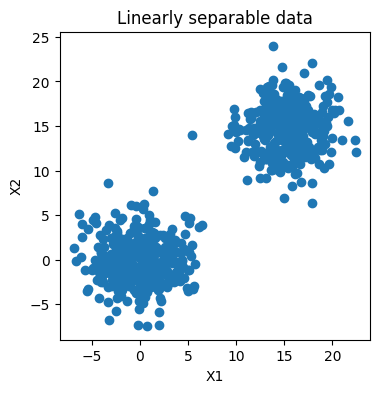

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

We will build a simple CNN model with two hidden layers, that uses sigmoid as the activation function, and binary cross-entropy as the loss function let's define the archieture of our model

In [ ]:
feature_vector_shape = X_training.shape[1]
input_shape = (feature_vector_shape,)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


120/120 [==============================] - 2s 4ms/step - loss: 0.3491 - accuracy: 0.4283 - val_loss: -0.4795 - val_accuracy: 0.5133
Epoch 2/30
120/120 [==============================] - 0s 3ms/step - loss: -1.2941 - accuracy: 0.4883 - val_loss: -1.9213 - val_accuracy: 0.4800
Epoch 3/30
120/120 [==============================] - 0s 3ms/step - loss: -2.9973 - accuracy: 0.4767 - val_loss: -4.0631 - val_accuracy: 0.5000
Epoch 4/30
120/120 [==============================] - 0s 3ms/step - loss: -6.2397 - accuracy: 0.4733 - val_loss: -8.0303 - val_accuracy: 0.5000
Epoch 5/30
120/120 [==============================] - 0s 3ms/step - loss: -11.7644 - accuracy: 0.4733 - val_loss: -14.2943 - val_accuracy: 0.4867
Epoch 6/30
120/120 [==============================] - 0s 2ms/step - loss: -20.5101 - accuracy: 0.4683 - val_loss: -24.2527 - val_accuracy: 0.5000
Epoch 7/30
120/120 [==============================] - 1s 6ms/step - loss: -33.4701 - accuracy: 0.4700 - val_loss: -38.4863 - val_accuracy: 0.493

We will now use the trained model to make predictions on an unseen test dataset

In [ ]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

8/8 [==============================] - 0s 4ms/step - loss: -2627.1455 - accuracy: 0.4800
Test results - Loss: -2627.1455078125 - Accuracy: 47.999998927116394%


9600/9600 [==============================] - 15s 2ms/step


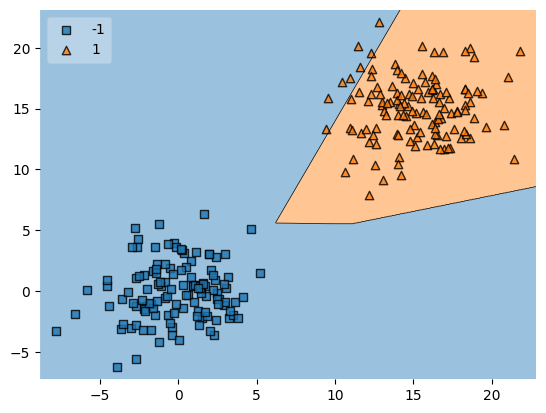

<Figure size 400x400 with 0 Axes>

In [ ]:
plot_decision_regions(X_testing,Targets_testing,clf=model,legend=2)
plt.figure(figsize=(4,4))
plt.show()

The model successfuly classifies the two clusters into two classes

### Multi-Class Classification

Similar to binary classification, let's create another data set with 1000 samples, and use 750 of those samples for training a simple CNN model.

Let us define a few more configuration options.


*   **num_samples**: refers to the total number of samples in our dataset
*   **test_split**: refers to the number of samples to be used for testing
*   **cluster_centers**: we define 3 centers for our isotropic Gaussian blobs
*   **num_classes**: we have 3 classes
*   **loss_function_used**: since this is a multi-class classification problem, we use categorical cross-entropy loss


In [ ]:
num_samples = 1000
train_split = 250
cluster_centers = [(-10, 5), (0, 0), (10, 5)]
num_classes = len(cluster_centers)
loss_function_used = CategoricalCrossentropy(from_logits=True)

In [ ]:
X_training, Targets_training, X_testing, Targets_testing= generate_multiclass_blobs(num_samples, train_split,
              cluster_centers, num_classes,
              loss_function_used)

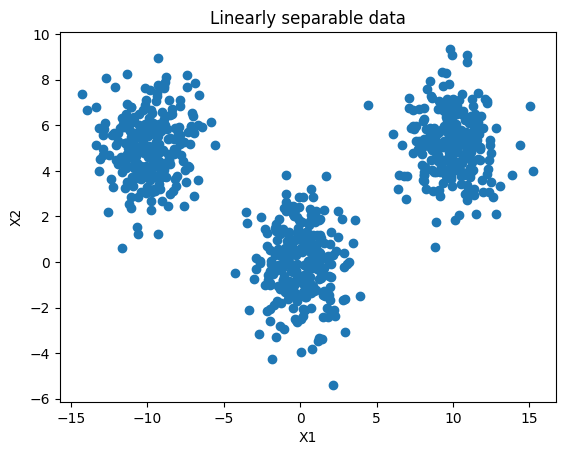

In [ ]:
# Let's take a look at one of the samples

plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

We will build a simple CNN model with two hidden layers, that uses softmax as the activation function, and categorical cross-entropy as the loss function. Let's define the architecture of our model:

In [ ]:
feature_vector_shape = X_training.shape[1]
input_shape = (feature_vector_shape,)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


120/120 [==============================] - 2s 8ms/step - loss: 2.2155 - accuracy: 0.4017 - val_loss: 0.7907 - val_accuracy: 0.5867
Epoch 2/30
120/120 [==============================] - 1s 7ms/step - loss: 0.5964 - accuracy: 0.7367 - val_loss: 0.4356 - val_accuracy: 0.9000
Epoch 3/30
120/120 [==============================] - 0s 3ms/step - loss: 0.3564 - accuracy: 0.9250 - val_loss: 0.3023 - val_accuracy: 0.9667
Epoch 4/30
120/120 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.9583 - val_loss: 0.2141 - val_accuracy: 0.9667
Epoch 5/30
120/120 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 0.9767 - val_loss: 0.1135 - val_accuracy: 0.9933
Epoch 6/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.9883 - val_loss: 0.0675 - val_accuracy: 0.9933
Epoch 7/30
120/120 [==============================] - 0s 4ms/step - loss: 0.0530 - accuracy: 0.9950 - val_loss: 0.0447 - val_accuracy: 0.9933
Epoch 8/30
120/12

In [ ]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

8/8 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9960
Test results - Loss: 0.004626049194484949 - Accuracy: 99.59999918937683%


In [ ]:
class Onehot2Int(object):
  def __init__(self,model):
    self.model = model
  def predict(self,X):
    y_pred = self.model.predict(X)
    return np.argmax(y_pred,axis=1)

# fit keras model
keras_model_no_ohe = Onehot2Int(model)

9600/9600 [==============================] - 17s 2ms/step


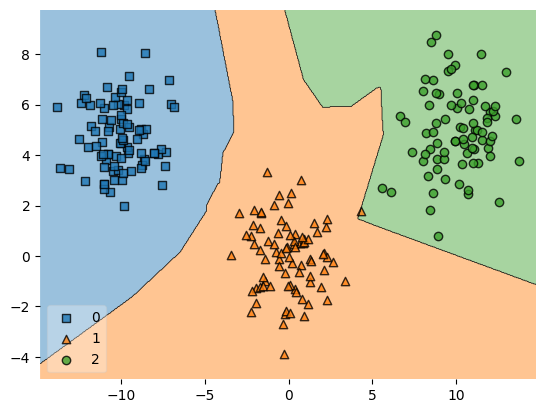

In [ ]:
# Plot decision boundary
plot_decision_regions(X_testing, np.argmax(Targets_testing, axis=1), clf=keras_model_no_ohe, legend=3)
plt.show()

# Example MNIST Hand-Written Digits

Let us first load our MNIST hand-written dataset using the keras library


In [ ]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


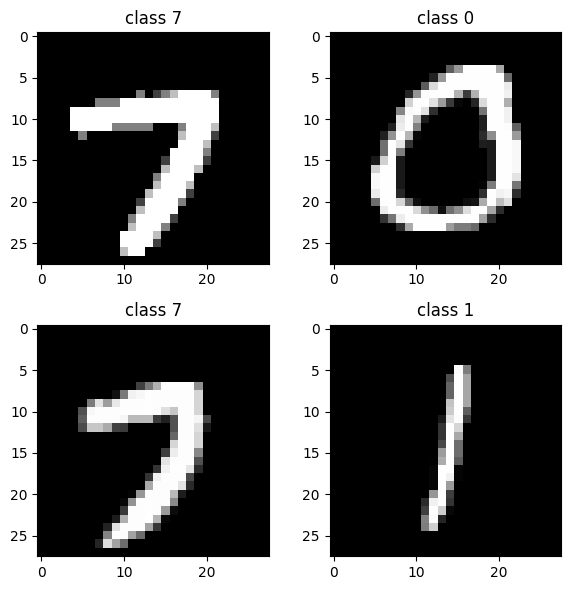

In [ ]:
# Now we can plot some sample digits from the training set

plt.rcParams['figure.figsize'] = (6,6)

for i in range(4):
    plt.subplot(2,2,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("class {}".format(y_train[num]))

plt.tight_layout()

Each image is on a grayscale (that is, only 1 channel) and is of size 28x28. We need to flatten each image by reshaping our matrix from 28x28 to a 784-length vector.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Next, we need to change integers to 32-bit floating point numbers. We would also need to normalize our input to be in the range [0, 1], rather than [0-255].

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# Our target variable, u is an array of the following form:

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The categorical cross-entropy function expects that we provide one-hot encoded representations of the labels and predictions. Let us one-hot encode our target, `y`, using the `OneHotEncoder()` function from sklearn.

In [ ]:
enc = OneHotEncoder(sparse=False)
enc.fit(y_train.reshape(-1,1))
print(enc.categories_)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_train_enc = enc.transform(y_train.reshape(-1,1))
y_test_enc = enc.transform(y_test.reshape(-1,1))

In this multi-class classification task, we want to interpret our logistic regression model's results as a probability distribution; that is the model should output a vector that represents the probability of the given image belonging to each of the 10 classes.

All elements in the vector should fall into the \[0,1] range and sum up to 1. In order to set up our classification problem this way, we can feed the model output to a softmax function to produce probabilities.

For training our multi-class logistic classifier, we need a loss function. Categorical cross-entropy is a loss function widely used with softmax. We need to minimize this loss function in order to determine an optimal set of parameters.

We will build a simple CNN model with two hidden layers, that uses softmax as the activation function, and categorical cross-entropy as the loss function. Let's define the architecture of our model:


In [ ]:
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used=CategoricalCrossentropy(from_logits=True)
model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9600/9600 [==============================] - 33s 3ms/step - loss: 0.4399 - accuracy: 0.8676 - val_loss: 0.2689 - val_accuracy: 0.9233
Epoch 2/25
9600/9600 [==============================] - 27s 3ms/step - loss: 0.2726 - accuracy: 0.9213 - val_loss: 0.2502 - val_accuracy: 0.9317
Epoch 3/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.2433 - accuracy: 0.9301 - val_loss: 0.2266 - val_accuracy: 0.9363
Epoch 4/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.2226 - accuracy: 0.9373 - val_loss: 0.2290 - val_accuracy: 0.9361
Epoch 5/25
9600/9600 [==============================] - 26s 3ms/step - loss: 0.2097 - accuracy: 0.9402 - val_loss: 0.2166 - val_accuracy: 0.9385
Epoch 6/25
9600/9600 [==============================] - 27s 3ms/step - loss: 0.2008 - accuracy: 0.9423 - val_loss: 0.2186 - val_accuracy: 0.9405
Epoch 7/25
9600/9600 [==============================] - 26s 3ms/step - loss: 0.1941 - accuracy: 0.9445 - val_loss: 0.2159 - val_accuracy: 0.9

In [ ]:
test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.1997 - accuracy: 0.9446
Test results - Loss: 0.19969169795513153 - Accuracy: 94.4599986076355%


## Example: Single-Digit House Number Recognition

Recognizing multi-digit text from photographs is a hard problem. In this example, we deal with a simpler sub-problem that involves using a convolutional neural network with the categorical cross-entropy loss function to build a classifier that identifies single-digit numbers from custom images.

First, let's load in a custom image using a URL. \[Image from [comforthouse](https://www.comforthouse.com/floating-1-number-sign.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01).]

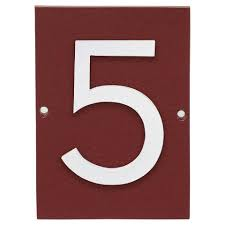

In [ ]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/images/house_number_5.jpeg'
image = Image.open(urlopen(URL)).convert('RGB')
image

Let us define a CNN architecture that is similar to one used for MNIST hand-written digit classification. We use a softmax as the activation function and categorical cross-entropy as the loss function as this is a multi-class classification problem.

In [ ]:
feature_vector_shape,input_shape = 784,784
num_classes = 10
loss_function_used = CategoricalCrossentropy(from_logits=True)
model = Sequential()
model.add(Dense(12, input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/25
9600/9600 [==============================] - 33s 3ms/step - loss: 0.4760 - accuracy: 0.8576 - val_loss: 0.2658 - val_accuracy: 0.9247
Epoch 2/25
9600/9600 [==============================] - 26s 3ms/step - loss: 0.2662 - accuracy: 0.9215 - val_loss: 0.2474 - val_accuracy: 0.9301
Epoch 3/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.2340 - accuracy: 0.9314 - val_loss: 0.2510 - val_accuracy: 0.9266
Epoch 4/25
9600/9600 [==============================] - 26s 3ms/step - loss: 0.2155 - accuracy: 0.9363 - val_loss: 0.2340 - val_accuracy: 0.9344
Epoch 5/25
9600/9600 [==============================] - 26s 3ms/step - loss: 0.2031 - accuracy: 0.9403 - val_loss: 0.2081 - val_accuracy: 0.9384
Epoch 6/25
9600/9600 [==============================] - 26s 3ms/step - loss: 0.1912 - accuracy: 0.9442 - val_loss: 0.2065 - val_accuracy: 0.9397
Epoch 7/25
9600/9600 [==============================] - 27s 3ms/step - loss: 0.1830 - accuracy: 0.9457 - val_loss: 0.2077 - val_ac

We must now pre-process our raw input images to be grayscale and 28x28 in size.

In [ ]:
img_rows, img_cols = 28, 28
img = Image.fromarray(np.uint8(image)).convert('L')
img_gray = img.resize((img_rows, img_cols), Image.ANTIALIAS)
img_gray

<ipython-input-40-3944361edd23>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_gray = img.resize((img_rows, img_cols), Image.ANTIALIAS)


we will now convert the image to an array, and reshape it such that it has a dimension of (1,784)

In [ ]:
arr = np.array(img_gray)
arr = arr.reshape((img_cols*img_rows))
arr = np.expand_dims(arr, axis=0)

Finally, we will feed the array as an input to our model, and use the argmax function to determine the most likely digit label.

In [ ]:
prediction = model.predict(arr)
np.argmax(prediction)

1/1 [==============================] - 0s 66ms/step


2

# Exericese

For these exercises, we will be using the Fashion-MNIST dataset. It consists of 60,000 28x28 grayscale training images and 10,000 test images for 10 different categories, listed below:

0.  T-shirt
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot


## Exercise 1 - Loading and plotting the images

Similar to the MNIST hand-written digits dataset, Fashion-MNIST is available for loading through Keras. Load the dataset using Keras in a similar manner. Plot some sample images from the training set.

4422102/4422102 [==============================] - 0s 0us/step


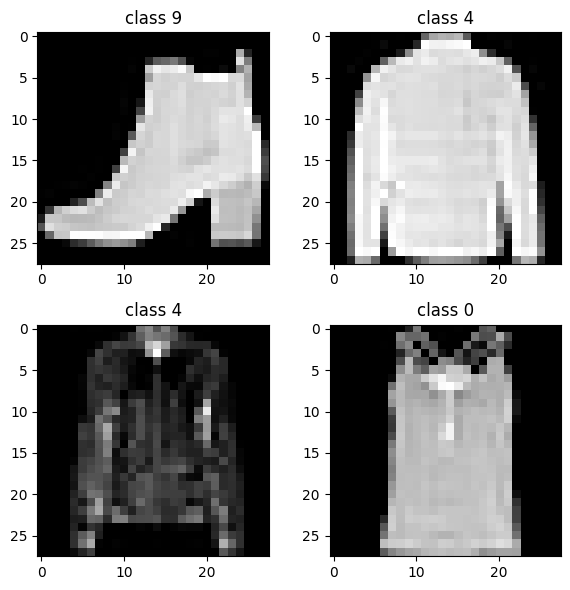

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


plt.rcParams['figure.figsize'] = (6,6)

for i in range(4):
    plt.subplot(2,2,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("class {}".format(y_train[num]))

plt.tight_layout()

### Exercise 2 - Preparing the data

Convert all grayscale images of size 28x28 to a 784-length vector. Change integers to 32-bit floating point numbers and normalize the input to be in the range [0, 1], rather than [0-255].

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

(60000, 784)
(10000, 784)


# Ex-3 One hot encoding

Create one-hot encoded representations of the target variable using the `OneHotEncoder()` function from sklearn.

In [ ]:
enc = OneHotEncoder(sparse=False)
enc.fit(y_train.reshape(-1, 1))
print(enc.categories_)
y_train_enc = enc.transform(y_train.reshape(-1,1))
y_test_enc = enc.transform(y_test.reshape(-1,1))

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Ex4 Build model architecture

Build a CNN model with 2 hidden layers, that uses softmax as the activation function, and categorical cross-entropy as the loss function.

In [ ]:
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used = CategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9600/9600 [==============================] - 32s 3ms/step - loss: 0.7181 - accuracy: 0.7410 - val_loss: 0.5483 - val_accuracy: 0.8136
Epoch 2/25
9600/9600 [==============================] - 32s 3ms/step - loss: 0.5085 - accuracy: 0.8210 - val_loss: 0.4853 - val_accuracy: 0.8328
Epoch 3/25
9600/9600 [==============================] - 27s 3ms/step - loss: 0.4653 - accuracy: 0.8368 - val_loss: 0.4678 - val_accuracy: 0.8378
Epoch 4/25
9600/9600 [==============================] - 30s 3ms/step - loss: 0.4380 - accuracy: 0.8448 - val_loss: 0.4411 - val_accuracy: 0.8437
Epoch 5/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.4198 - accuracy: 0.8508 - val_loss: 0.4364 - val_accuracy: 0.8467
Epoch 6/25
9600/9600 [==============================] - 27s 3ms/step - loss: 0.4058 - accuracy: 0.8548 - val_loss: 0.4340 - val_accuracy: 0.8442
Epoch 7/25
9600/9600 [==============================] - 28s 3ms/step - loss: 0.3959 - accuracy: 0.8566 - val_loss: 0.4370 - val_accuracy: 0.8

# (Optional) Ex5 - Sparse Categorical Cross Entropy

We saw that when using categorical cross-entropy, the ground truth labels need to be one-hot encoded. Keras provides another loss function called sparse cross-entropy where we can leave the labels as integers.

Build a CNN model with two hidden layers, that uses softmax as the activation function, and sparse categorical cross-entropy as the loss function. Make sure to use the non-one-hot encoded ground-truth labels.  


In [ ]:
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used = SparseCategoricalCrossentropy()

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Epoch 1/25
9600/9600 [==============================] - 35s 4ms/step - loss: 0.5960 - accuracy: 0.7916 - val_loss: 0.4858 - val_accuracy: 0.8311
Epoch 2/25
9600/9600 [==============================] - 24s 2ms/step - loss: 0.4505 - accuracy: 0.8430 - val_loss: 0.4490 - val_accuracy: 0.8435
Epoch 3/25
9600/9600 [==============================] - 24s 2ms/step - loss: 0.4172 - accuracy: 0.8535 - val_loss: 0.4229 - val_accuracy: 0.8533
Epoch 4/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.3995 - accuracy: 0.8597 - val_loss: 0.4107 - val_accuracy: 0.8528
Epoch 5/25
9600/9600 [==============================] - 27s 3ms/step - loss: 0.3866 - accuracy: 0.8629 - val_loss: 0.4179 - val_accuracy: 0.8503
Epoch 6/25
9600/9600 [==============================] - 26s 3ms/step - loss: 0.3771 - accuracy: 0.8665 - val_loss: 0.4379 - val_accuracy: 0.8467
Epoch 7/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.3695 - accuracy: 0.8673 - val_loss: 0.3912 - val_ac

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1920, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/accuracy_metrics.py", line 459, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 961, in sparse_categorical_matches
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](IteratorGetNext:1)' with input shapes: [?,10].
